In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

In [2]:
df=pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
x = df.drop(columns=['species'])
y = df['species']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [9]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf_classifier.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_matrix)

Confusion matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [15]:
class_report = classification_report(y_test, y_pred)
print("Classification report:")
print(class_report)

Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



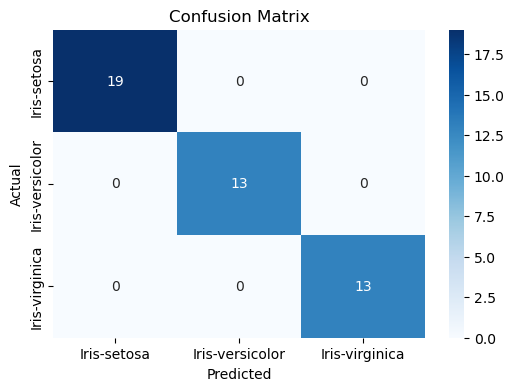

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()